In [1]:
n = 1000
p = 500

In [2]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt 

rng = default_rng()
X = rng.standard_normal((n, p))
b = rng.standard_normal(p)/np.sqrt(p)
e = rng.standard_normal(n)
Y0 = X.dot(b)
Y = Y0 + e 
PVE = np.var(Y0, ddof=1)/np.var(Y, ddof=1)

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

In [4]:
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

reg.coef_, reg.intercept_

(array([0.34545455, 0.34545455]), 0.1363636363636364)

In [5]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

reg.alpha_

0.01

In [6]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.predict([[1, 1]])

array([0.8])

Perfom LassoCV

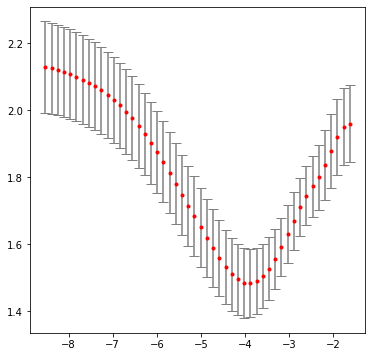

In [7]:
reg = linear_model.LassoCV(cv=10, n_alphas=50)
reg.fit(X, Y)
reg_mean = np.mean(reg.mse_path_, axis=1)
reg_std = 0.5*np.std(reg.mse_path_, axis=1, ddof=1)
fig = plt.figure(figsize=(6,6))
plt.errorbar(np.log(reg.alphas_), reg_mean, reg_std, fmt='.r', ecolor='gray', capsize=5)
plt.show()

In [8]:
min(reg_mean)

1.4837703456572338

In [9]:
lasso = linear_model.Lasso()
lasso.set_params(alpha=reg.alpha_)
lasso.fit(X, Y)

Lasso(alpha=0.020733689417744984)

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lasso.predict(X), Y)

0.6922520484902414

In [11]:
X = rng.standard_normal((n, p))
e = rng.standard_normal(n)
Y0 = X.dot(b)
Y = Y0 + e 
mean_squared_error(lasso.predict(X), Y)

1.508141893995119

Perfom General Cross Validation

In [12]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [13]:
def CrossValidation(model, X_train, y_train, n_splits=10, seed=2021, my_score=mse):
    cv_scores = []
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    
    for train_idx, test_idx in kf.split(X_train):
        
        X_CVtrain = X_train[train_idx]
        y_CVtrain = y_train[train_idx]
        X_CVholdout = X_train[test_idx]
        y_CVholdout = y_train[test_idx]
        
        model.fit(X_CVtrain, y_CVtrain)
        pred = model.predict(X_CVholdout)
        
        cv_scores.append(my_score(y_CVholdout, pred))
    
    return cv_scores

In [14]:
alphas = np.logspace(-9, -1.5, 50, base=np.e)
tuned_parameters = [{'alpha':alphas}]
n_folds = 10

In [15]:
clf = GridSearchCV(lasso, 
                   tuned_parameters, 
                   scoring='neg_mean_squared_error', 
                   cv=n_folds, 
                   refit=False)
clf.fit(X, Y)

GridSearchCV(cv=10, estimator=Lasso(alpha=0.020733689417744984),
             param_grid=[{'alpha': array([1.23409804e-04, 1.43821332e-04, 1.67608853e-04, 1.95330741e-04,
       2.27637729e-04, 2.65288173e-04, 3.09165863e-04, 3.60300761e-04,
       4.19893183e-04, 4.89341974e-04, 5.70277339e-04, 6.64599117e-04,
       7.74521370e-04, 9.02624361e-04, 1.05191511e-03, 1.22589801e-03,
       1.42865704e-03, 1.66...
       8.96626826e-03, 1.04492561e-02, 1.21775247e-02, 1.41916425e-02,
       1.65388881e-02, 1.92743595e-02, 2.24622677e-02, 2.61774443e-02,
       3.05070975e-02, 3.55528594e-02, 4.14331717e-02, 4.82860662e-02,
       5.62724042e-02, 6.55796532e-02, 7.64262870e-02, 8.90669142e-02,
       1.03798255e-01, 1.20966105e-01, 1.40973454e-01, 1.64289946e-01,
       1.91462900e-01, 2.23130160e-01])}],
             refit=False, scoring='neg_mean_squared_error')

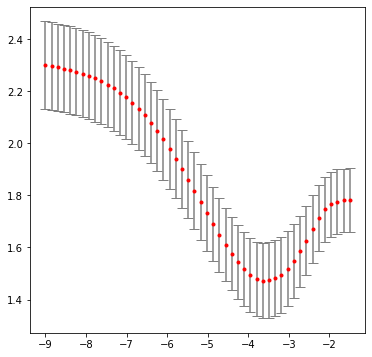

In [16]:
scores = -clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

fig = plt.figure(figsize=(6,6))
plt.errorbar(np.log(alphas), scores, 0.5*scores_std, fmt='.r', ecolor='gray', capsize=5)
plt.show()                    

In [17]:
min(scores)

1.5619086228502455

In [18]:
clf.best_params_, clf.best_score_

({'alpha': 0.026177444319090432}, -1.5619086228502455)

In [19]:
lasso = linear_model.Lasso()
lasso.set_params(alpha=clf.best_params_['alpha'])
lasso.fit(X,Y)

Lasso(alpha=0.026177444319090432)

In [20]:
mse(lasso.predict(X), Y)

0.8327884866337236

In [22]:
X = rng.standard_normal((n, p))
e = rng.standard_normal(n)
Y0 = X.dot(b)
Y = Y0 + e 
mean_squared_error(lasso.predict(X), Y)

1.578942006584449